# Santiago Mosquera Erazo
# Diego Andrés Erira Benítez
# Daniel Jesus Pino Silgado

# 

# **Taller # 2**

# Punto 1

In [4]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.special import gamma
from scipy.stats import expon
from sklearn.neighbors import KernelDensity
import sympy as sym
import matplotlib.pyplot as plt
import seaborn as sns ## LIBRERIA PARA HISTOGRAMA 
import scipy.fftpack as fourier
import control
from scipy.fftpack import fft, fftfreq, fftshift
from lcapy import Circuit, j, omega, s
from numpy import logspace
from scipy.signal import lti
from scipy import signal
from scipy.signal import butter, lfilter

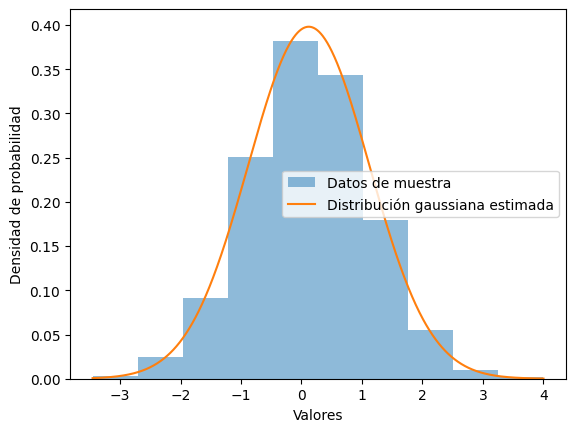

In [6]:
# Datos de muestra
mu = 0.1  # Media verdadera
sigma = 1  # Desviación estándar verdadera
N = 4096  # Número de muestras
data = np.random.normal(loc=mu, scale=sigma, size=N)  # Generar datos de muestra

# Función de log-verosimilitud para una distribución gaussiana
def log_likelihood(params, data):
    mu, sigma = params  # Parámetros a estimar: media y desviación estándar
    N = len(data)  # Número de muestras
    log_likelihood = -0.5 * N * np.log(2 * np.pi) - N * np.log(sigma) - np.sum((data - mu) ** 2) / (2 * sigma ** 2)  # Fórmula de log-verosimilitud para una distribución gaussiana
    return -log_likelihood  # Se devuelve el negativo del log-verosimilitud para minimizar

# Estimación de máxima verosimilitud para los parámetros de la distribución gaussiana
result = minimize(lambda params: log_likelihood(params, data), x0=[0, 1], method='L-BFGS-B')  # Estimar mu y sigma utilizando el método de máxima verosimilitud
mu_hat, sigma_hat = result.x  # Obtener los valores estimados de mu y sigma

# Generar una grilla de valores para graficar la distribución gaussiana estimada
x = np.linspace(np.min(data), np.max(data), 1000)  # Generar una grilla de valores para el eje x
pdf = 1 / (sigma_hat * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu_hat) / sigma_hat) ** 2)  # Calcular los valores de la distribución gaussiana estimada en la grilla de valores x

# Graficar los datos de muestra y la distribución gaussiana estimada
plt.hist(data, density=True, alpha=0.5, label='Datos de muestra')  # Graficar histograma normalizado de los datos de muestra
plt.plot(x, pdf, label='Distribución gaussiana estimada')  # Graficar la distribución gaussiana estimada
plt.legend()  # Agregar leyenda a la gráfica
plt.xlabel('Valores')  # Etiquetar el eje x
plt.ylabel('Densidad de probabilidad')  # Etiquetar el eje y
plt.show()  # Mostrar la gráfica

# Punto 2

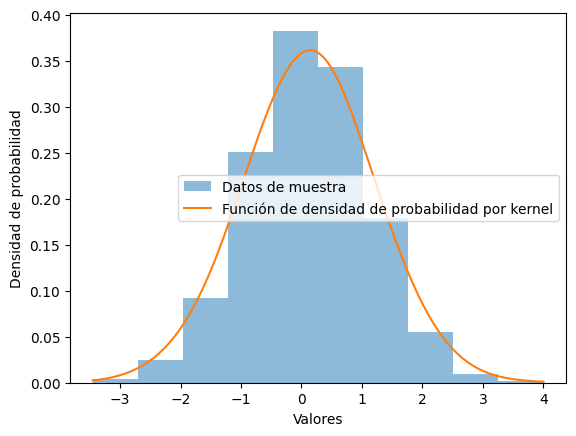

Media estimada: 0.12
Varianza estimada: 1.00


In [7]:
# Estimación de la función de densidad de probabilidad por kernel
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(data.reshape(-1, 1))  # Crear el objeto KernelDensity y ajustarlo a los datos
x = np.linspace(np.min(data), np.max(data), 1000)  # Generar una grilla de valores para el eje x
pdf = np.exp(kde.score_samples(x.reshape(-1, 1)))  # Calcular la PDF utilizando el objeto KernelDensity ajustado

# Graficar los datos de muestra y la función de densidad de probabilidad por kernel
plt.hist(data, density=True, alpha=0.5, label='Datos de muestra')  # Graficar histograma normalizado de los datos de muestra
plt.plot(x, pdf, label='Función de densidad de probabilidad por kernel')  # Graficar la función de densidad de probabilidad por kernel
plt.legend()  # Agregar leyenda a la gráfica
plt.xlabel('Valores')  # Etiquetar el eje x
plt.ylabel('Densidad de probabilidad')  # Etiquetar el eje y
plt.show()  # Mostrar la gráfica
print("Media estimada: {:.2f}".format(np.mean(data)))
print("Varianza estimada: {:.2f}".format(np.var(data)))



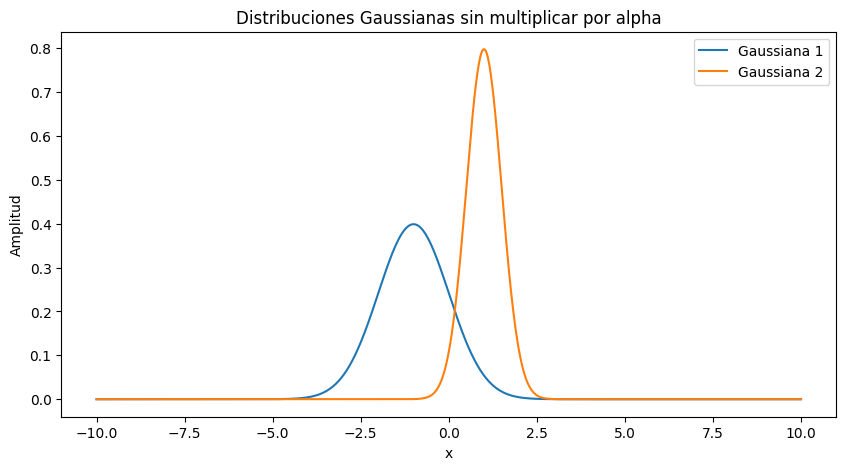

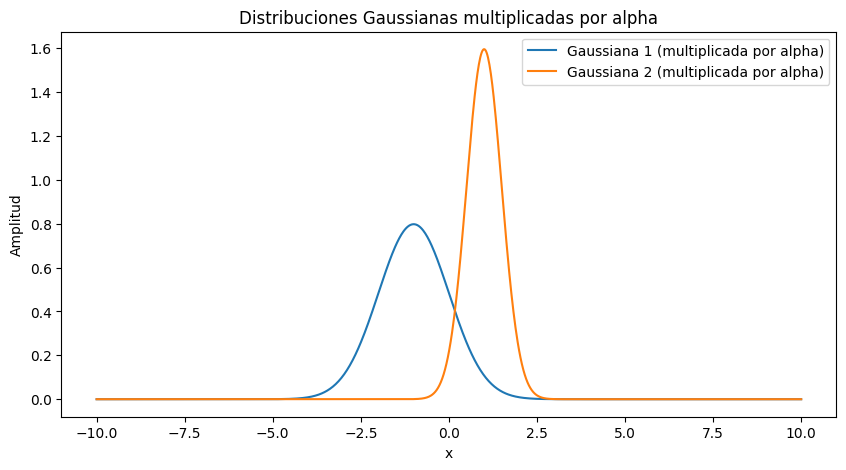

media1: 0.04995000000000001; media2: 0.04995000000000003
varianza1: 0.01159563234910522; varianza2: 0.02568626719821044
media1: 0.09990000000000002; media2: 0.09990000000000006
varianza1: 0.04638252939642088; varianza2: 0.10274506879284176


In [9]:
# Gassian * Lambda

#función para generar una gausssiana
def gaussian(x, mu, sigma):
    return np.exp(-(x - mu) ** 2 / (2 * sigma ** 2)) / (sigma * np.sqrt(2 * np.pi))

# Parámetros de las distribuciones gaussianas
mu1 = -1
mu2 = 1
sigma = 1
sigma2 = 0.5

# Valores de x
x = np.linspace(-10, 10, 1000)

# Distribuciones gaussianas sin multiplicar por alpha
y1 = gaussian(x, mu1, sigma)
y2 = gaussian(x, mu2, sigma2)

# Distribuciones gaussianas multiplicadas por alpha
alpha = 2
y1_alpha = alpha * y1
y2_alpha = alpha * y2

# Graficar las distribuciones sin multiplicar por alpha
plt.figure(figsize=(10, 5))
plt.plot(x, y1, label='Gaussiana 1')
plt.plot(x, y2, label='Gaussiana 2')
plt.title('Distribuciones Gaussianas sin multiplicar por alpha')
plt.xlabel('x')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

# Graficar las distribuciones multiplicadas por alpha
plt.figure(figsize=(10, 5))
plt.plot(x, y1_alpha, label='Gaussiana 1 (multiplicada por alpha)')
plt.plot(x, y2_alpha, label='Gaussiana 2 (multiplicada por alpha)')
plt.title('Distribuciones Gaussianas multiplicadas por alpha')
plt.xlabel('x')
plt.ylabel('Amplitud')
plt.legend()
plt.show()


print(f'media1: {np.mean(y1)}; media2: {np.mean(y2)}')
print(f'varianza1: {np.var(y1)}; varianza2: {np.var(y2)}')
print(f'media1: {np.mean(y1_alpha)}; media2: {np.mean(y2_alpha)}')
print(f'varianza1: {np.var(y1_alpha)}; varianza2: {np.var(y2_alpha)}')

# Punto 3

In [10]:
ctt=Circuit("""
    Vi 1 0 step;down
    R1 1 2; right, size=1.5
    L1 2 3; right, size=1
    C1 3 0; down, size=1.5
    ; autoground=true"""
)



In [11]:
##GENERAMOS LA FUNCIÓN DE TRANSFERENCIA DEL CIRCUITO TOMANDO LA SALIDA EN C1
H=(ctt.C1.V(s)/ctt.Vi.V(s)).simplify()
H

          1           
──────────────────────
       2              
C₁⋅L₁⋅s  + C₁⋅R₁⋅s + 1

In [12]:
#Dando valores al circuito:
L1=1.2e-3
R1=1e3
C1=1e-6
Coeficientes_num=[1] #Coeficientes numerador
Coeficientes_dem=[C1*L1,C1*R1,1] #Coeficientes denominador

In [13]:
sys = control.TransferFunction(Coeficientes_num, Coeficientes_dem)
dt = 0.001  # Base de tiempo deseada en segundos
sys_d = control.c2d(sys, dt)
lti_system = lti(Coeficientes_num, Coeficientes_dem) #FT
print(sys_d)


  0.6321 z + 0.0004425
-------------------------
z^2 - 0.3674 z - 2.04e-17

dt = 0.001



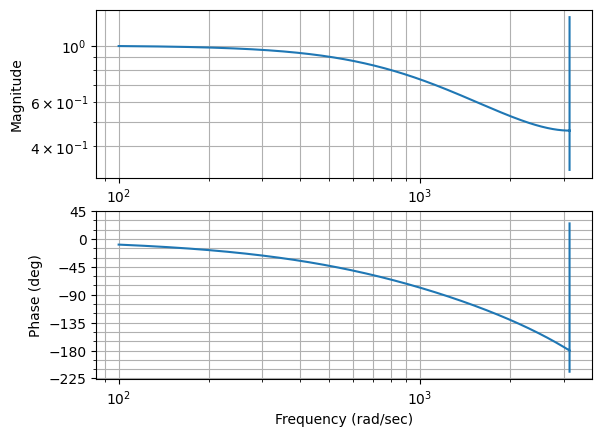

In [14]:
control.bode_plot(sys_d)
plt.show()

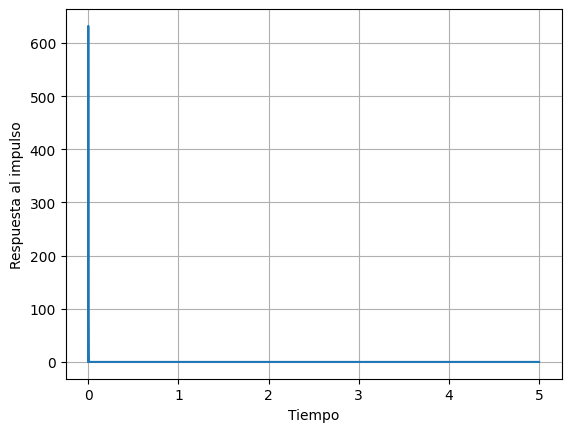

In [15]:

t, y = control.impulse_response(sys_d)
plt.plot(t, y)
plt.xlabel('Tiempo')
plt.ylabel('Respuesta al impulso')
plt.grid(True)
plt.show()

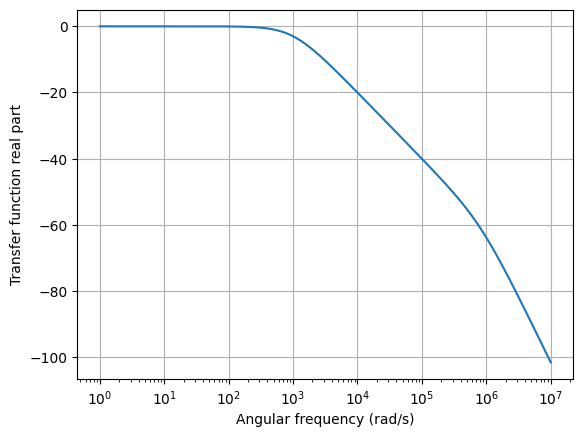

In [16]:
### LE ASIGNAMOS LOS VALORES A NUESTRA FUNCIÓN DE TRANSFERENCIA PARA VER EL COMPORTAMIENTO DEL CIRCUITO
### ASOCIADO A LOS PARAMETROS:
H_valores=H.subs("C1",C1).subs("L1",L1).subs("R1",R1)
W=logspace(0,7,2000) ## GENERAMOS VECTOR DE FRECUENCIAS EN ESCALA LOGARITMICA
X=H_valores(j*omega).dB.plot(W,log_frequency=True) ## GRAFICAMOS SEGUN UN VECTOR DE FRECUENCIAS


In [35]:
lti_system=lti(Coeficientes_num,Coeficientes_dem) #con esta funcion se haya la ft
T,h_imp=lti_system.impulse(N=N) #calcula la respuesta al impulso de un sistema, entregando el vector de tiempo y la respuesta al impulso

# Punto 4

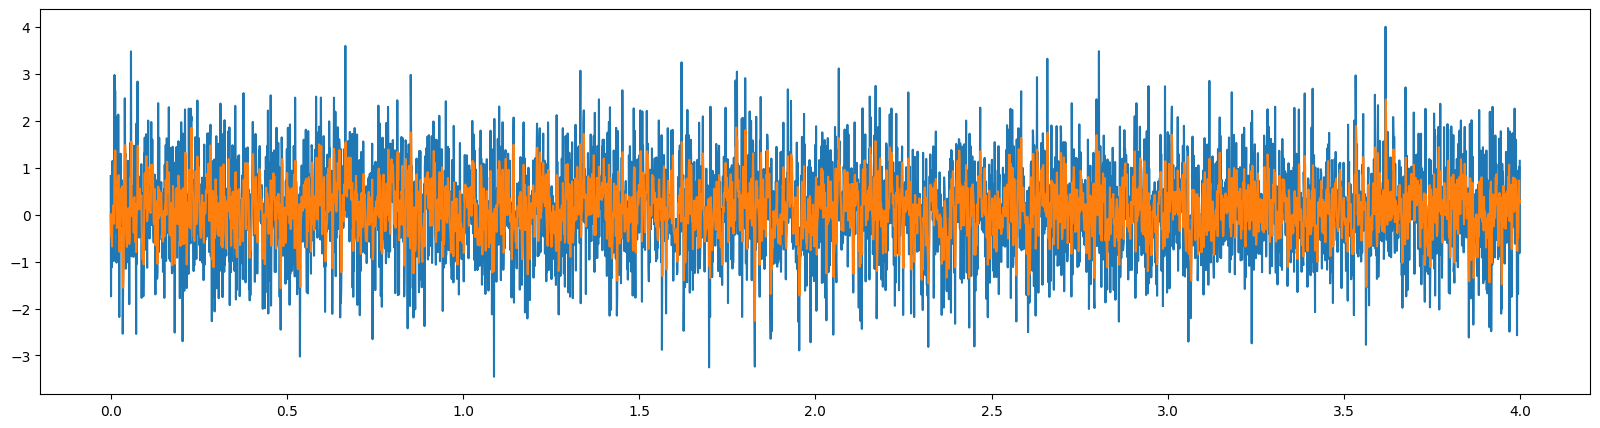

In [37]:
## GENERAMOS LA ENTRADA DE NUESTRO CIRCUITO:

#Nbins=int((1+3.322*np.log2(Nsample)))### NUMERO DE BINS PARA EL HISTOGRAMA
Fdisc=N/4 # FRECUENCIA DE MUESTREO
Tdisc=1/Fdisc
t=np.arange(0,4,Tdisc) ## GENERAMOS VECTOR DE TIEMPO PARA NUESTRA FUNCIÓN ALEATORIA


_,Output_Circuit,_=lti_system.output(data,T=t) ##SALIDA DEL CIRCUITO.

'''
plt.figure(figsize=(20,5))
plt.plot(t,data)
plt.xlabel('Time')
plt.ylabel('Data')
plt.title('Data')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(20,5))
plt.plot(t,Output_Circuit) # Graficar la señal de salida
plt.xlabel('Time')
plt.ylabel('Output')
plt.title('Data')
plt.grid()
plt.legend()
plt.show()
'''
#graficar entrada y salida
plt.figure(figsize=(20,5))
plt.plot(t,data)
plt.plot(t,Output_Circuit)



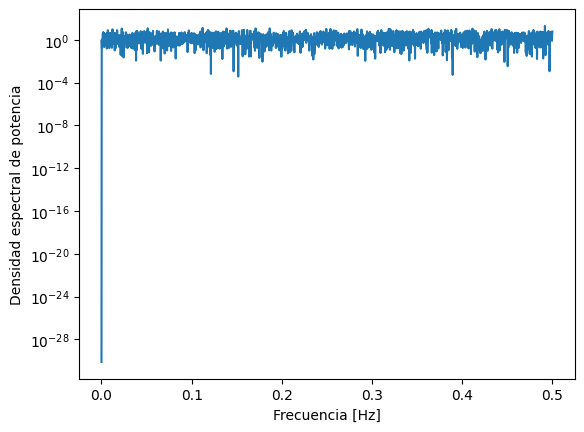

In [38]:
#Espectro de potencia de la entrada
f, Pxx = signal.periodogram(data) #Se calcula el espectro de potencia

# Graficar el espectro de potencia
plt.semilogy(f, Pxx)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.show()

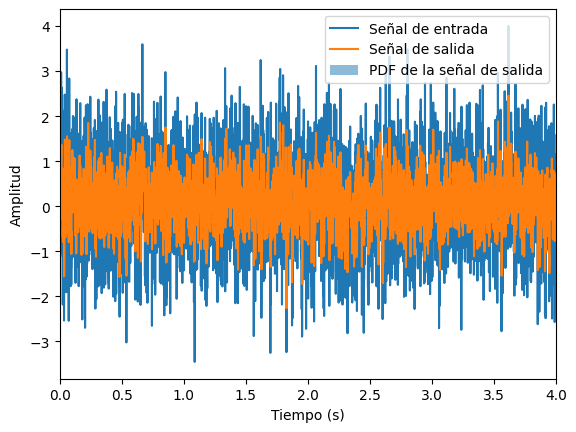

In [39]:
# Estimar la PDF de la señal de salida utilizando la estimación por kernel
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(Output_Circuit.reshape(-1, 1))  # Crear el objeto KernelDensity y ajustarlo a los datos
x_pdf = np.linspace(np.min(Output_Circuit), np.max(Output_Circuit), 4096)  # Generar una grilla de valores para el eje x
pdf = np.exp(kde.score_samples(x_pdf.reshape(-1, 1)))  # Calcular la PDF utilizando el objeto KernelDensity ajustado

# Graficar la señal de entrada, la señal de salida y la PDF de la señal de salida
plt.plot(t, data, label='Señal de entrada')  # Graficar la señal de entrada
plt.plot(t, Output_Circuit, label='Señal de salida')  # Graficar la señal de salida
plt.fill_between(x_pdf, pdf, alpha=0.5, label='PDF de la señal de salida')  # Graficar la PDF de la señal de salida
plt.legend()  # Agregar leyenda a la gráfica
plt.xlabel('Tiempo (s)')  # Etiquetar el eje x
plt.ylabel('Amplitud')  # Etiquetar el eje y
plt.xlim([0, 4])
plt.show()  # Mostrar la gráfica

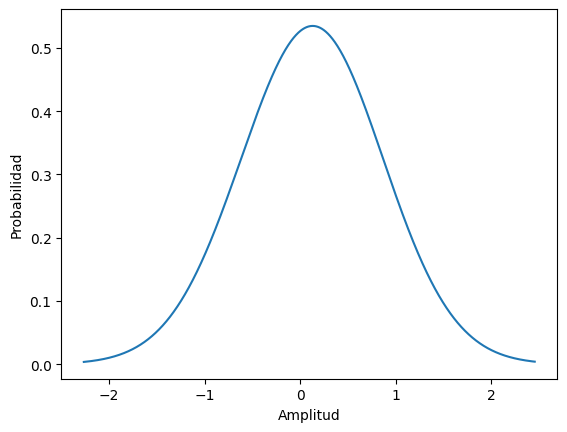

In [40]:
# Ajustar objeto KernelDensity a los datos de la señal de salida
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(Output_Circuit.reshape(-1, 1))

# Generar una grilla de valores para el eje x
x_pdf = np.linspace(np.min(Output_Circuit), np.max(Output_Circuit), 4096)

# Calcular la función de densidad de probabilidad utilizando el objeto KernelDensity ajustado
pdf = np.exp(kde.score_samples(x_pdf.reshape(-1, 1)))

# Graficar la PDF de la señal de salida
plt.plot(x_pdf, pdf)
plt.xlabel('Amplitud')
plt.ylabel('Probabilidad')
plt.show()

In [23]:
# Media de la PDF estimada
pdf_mean = np.mean(x_pdf * pdf)
# Varianza de la PDF estimada
pdf_var = np.mean((x_pdf - pdf_mean)**2 * pdf)
print("Media de la señal de salida: {:.2f}".format(pdf_mean))
print("Varianza de la señal de salida: {:.2f}".format(pdf_var))

Media de la señal de salida: 0.03
Varianza de la señal de salida: 0.12


In [41]:
media_entrada = np.mean(data)
varianza_entrada = np.var(data)
print("Media de la señal de entrada: {:.2f}".format(media_entrada))
print("Varianza de la señal de entrada: {:.2f}".format(varianza_entrada))

Media de la señal de entrada: 0.12
Varianza de la señal de entrada: 1.00


In [43]:
"""
t_out, y = control.forced_response(sys_d, T=t, U=data)
plt.plot(t, Output_Circuit, label='Señal de entrada')
plt.plot(t_out, y, label='Respuesta del sistema')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()
"""

"\nt_out, y = control.forced_response(sys_d, T=t, U=data)\nplt.plot(t, Output_Circuit, label='Señal de entrada')\nplt.plot(t_out, y, label='Respuesta del sistema')\nplt.xlabel('Tiempo')\nplt.ylabel('Amplitud')\nplt.legend()\nplt.grid(True)\nplt.show()\n"

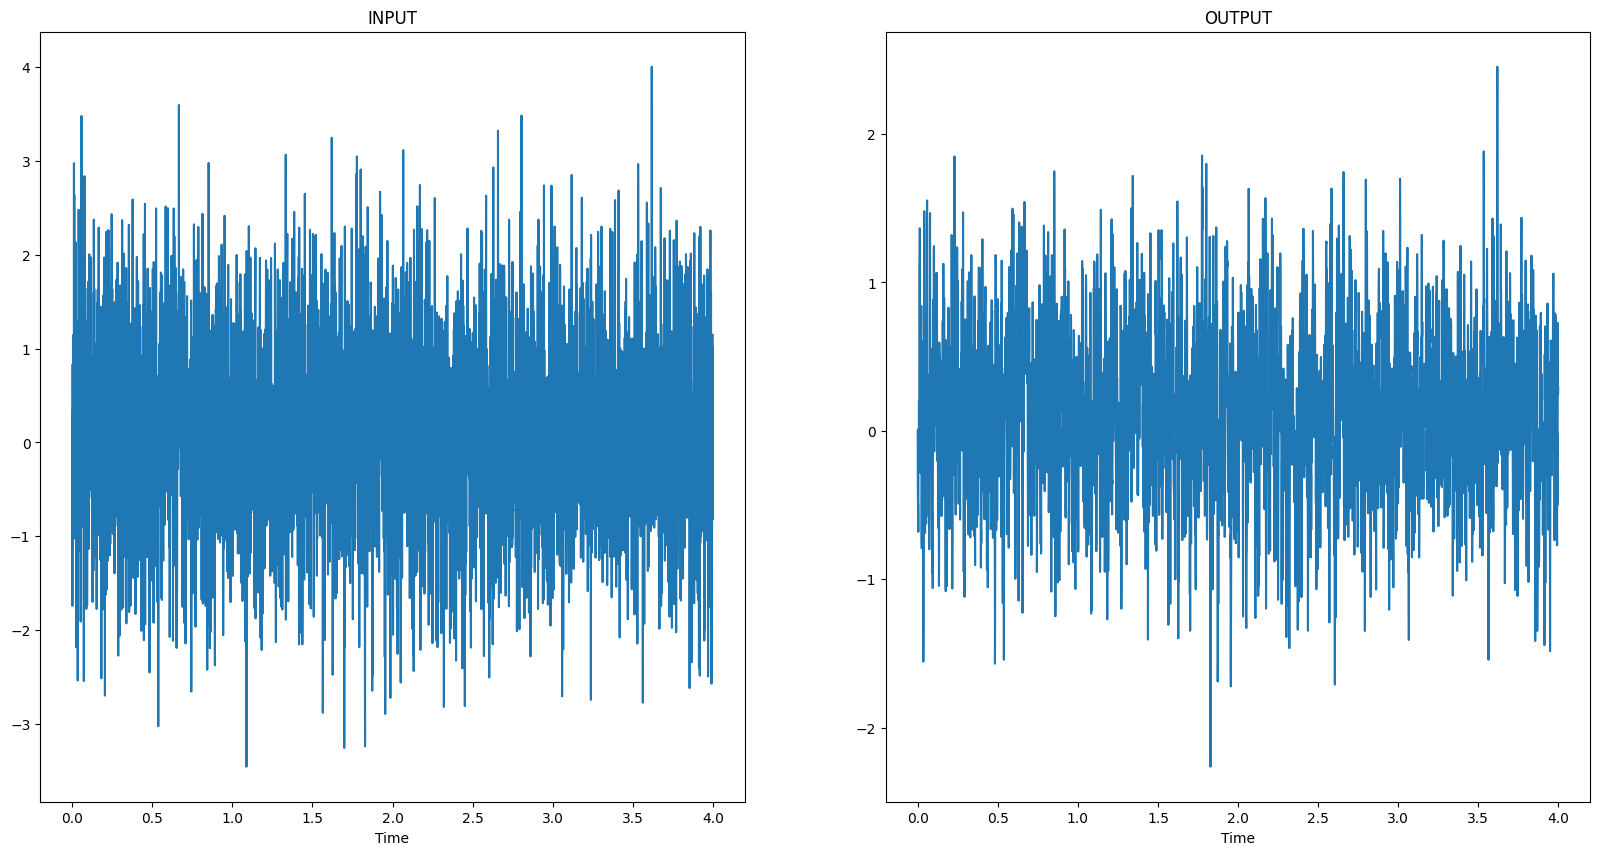

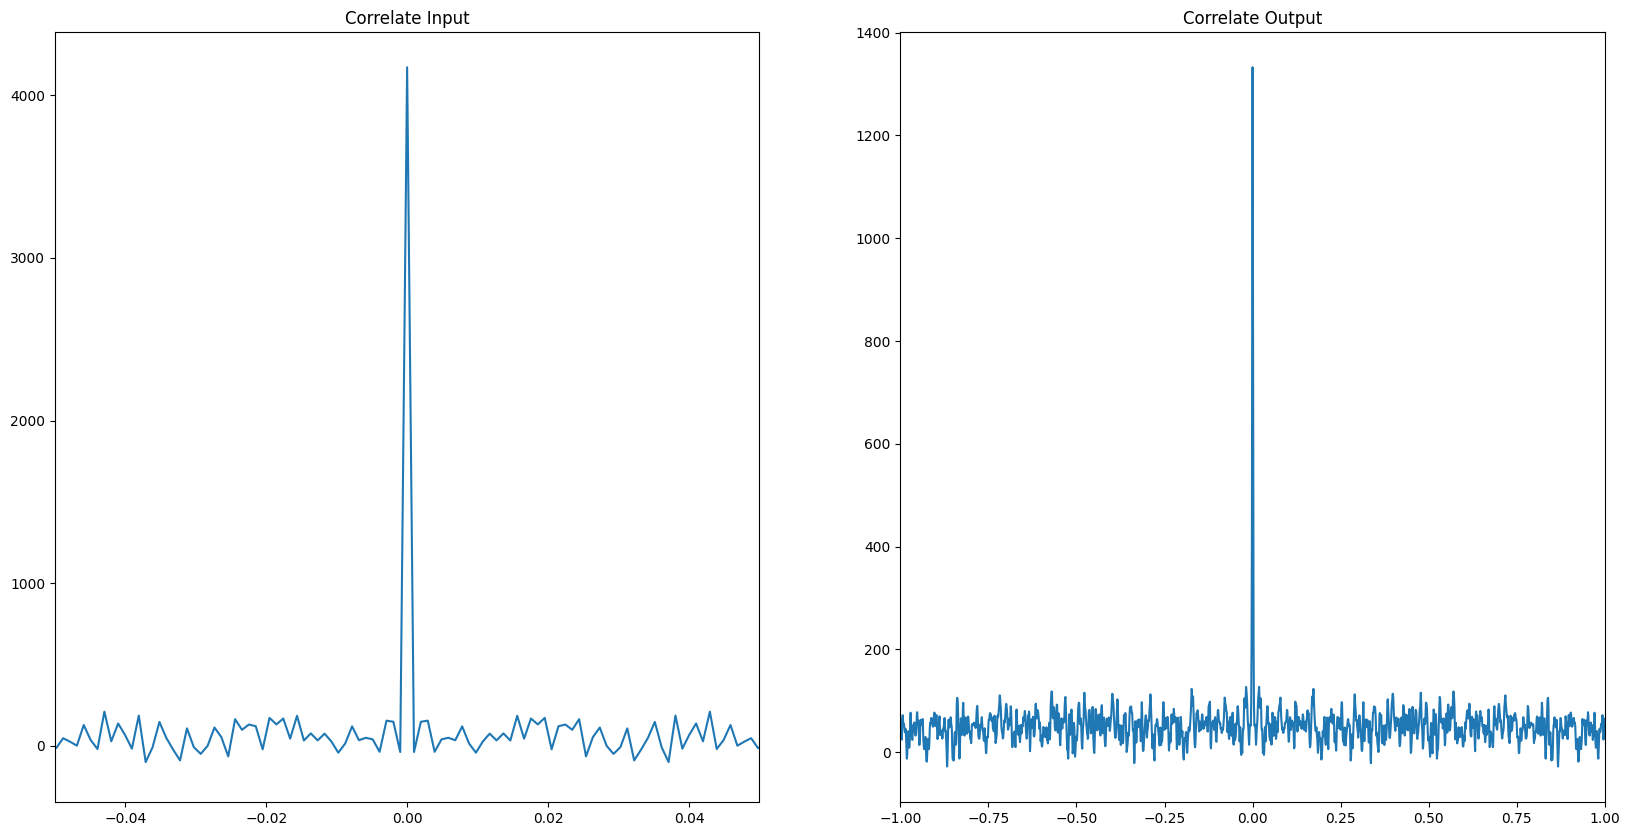

In [44]:
Autocorrelacion_expt=np.correlate(data,data,mode="same") ## GENERAMOS LA AUTOCORRELACION

Autocorrelacion_Output=np.correlate(Output_Circuit,Output_Circuit,mode="same") 
fig, axs = plt.subplots(1, 2,figsize=(20,10))
axs[0].plot(t, data)
axs[0].set_title("INPUT")
axs[0].set_xlabel("Time")
axs[1].plot(t, Output_Circuit)
axs[1].set_title("OUTPUT")
axs[1].set_xlabel("Time")




fig, axs = plt.subplots(1, 2,figsize=(20,10))
axs[0].plot(t-2,Autocorrelacion_expt)
axs[0].set_title("Correlate Input")
axs[0].set_xlim(-0.05,0.05)
axs[1].plot(t-2, Autocorrelacion_Output)
axs[1].set_title("Correlate Output")
axs[1].set_xlim(-1,1)

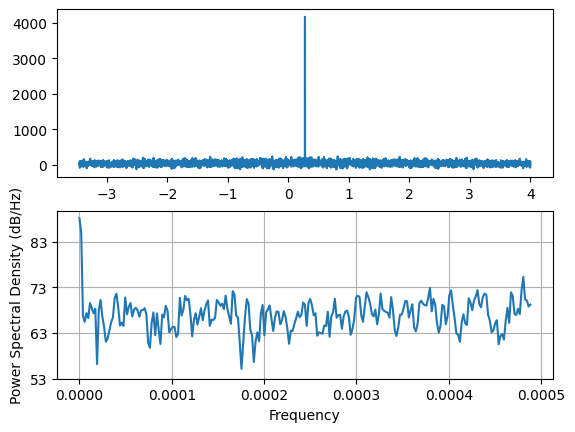

In [45]:
#Espectro de densidad de potencia de la entrada
ax = np.linspace(np.min(data), np.max(data), 4096)
plt.subplot(211)
plt.plot(ax, Autocorrelacion_expt)
plt.subplot(212)
plt.psd(Autocorrelacion_expt, 512, Tdisc)
 
plt.show()

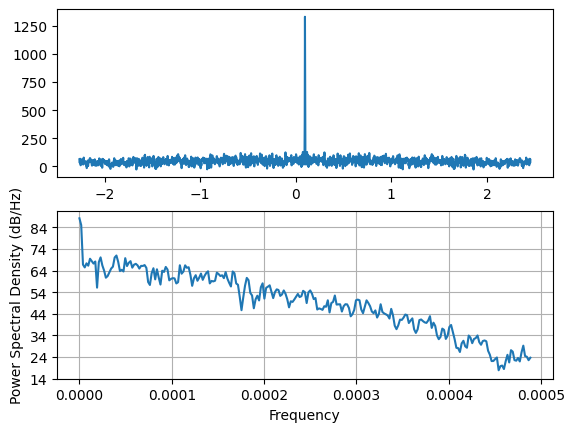

In [46]:
#Espectro de densidad de potencia de la salida
plt.subplot(211)
plt.plot(x_pdf, Autocorrelacion_Output)
plt.subplot(212)
plt.psd(Autocorrelacion_Output, 512, Tdisc)
 
plt.show()

# Taller # 3

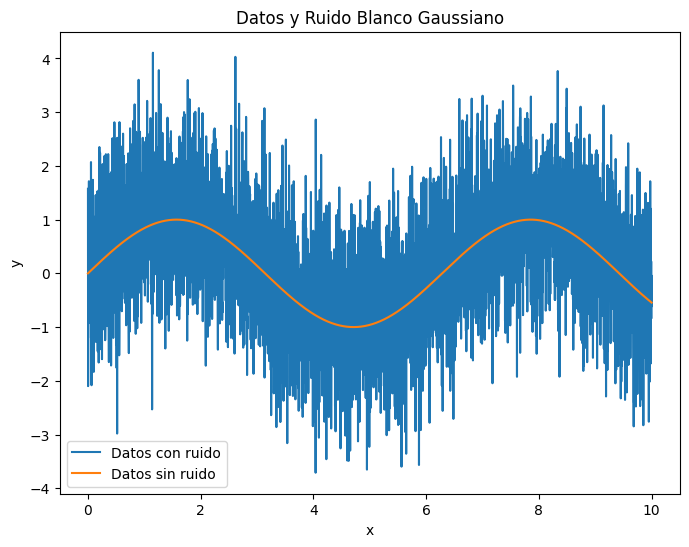

In [50]:
# Generación de ruido gaussiano
# utilizar la biblioteca de procesos estocasticos
# 1ro se genera ruido blanco gaussiano
# estimación de la funcion de correlacion ; media = 0 ; potencia = 1

Ndates = 4096
media = 0
var = 1
# generar ruido gaussiano
RBG = np.random.normal(media, var,Ndates)

# Generar datos simples
x = np.linspace(0, 10, Ndates)  # Valores x para los datos
y = np.sin(x) + RBG  # Generar datos y con ruido blanco gaussiano

# Graficar los datos y el ruido blanco gaussiano
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Datos con ruido')
plt.plot(x, np.sin(x), label='Datos sin ruido')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos y Ruido Blanco Gaussiano')
plt.legend()
plt.show()



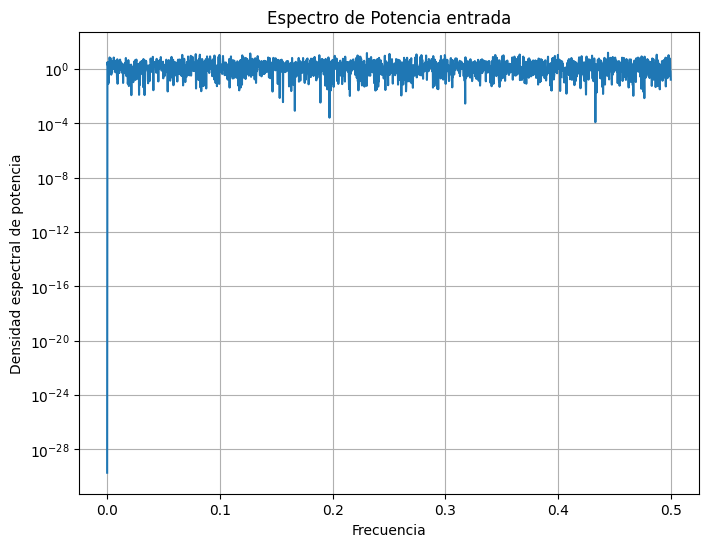

In [51]:
# Calcular el espectro de potencia a la entrada
f, psd = signal.periodogram(RBG)

# Graficar el espectro de potencia
plt.figure(figsize=(8, 6))
plt.semilogy(f, psd)
plt.xlabel('Frecuencia')
plt.ylabel('Densidad espectral de potencia')
plt.title('Espectro de Potencia entrada')
plt.grid(True)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9afc5df2-7a8e-45d5-af29-33246c0f6efa' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

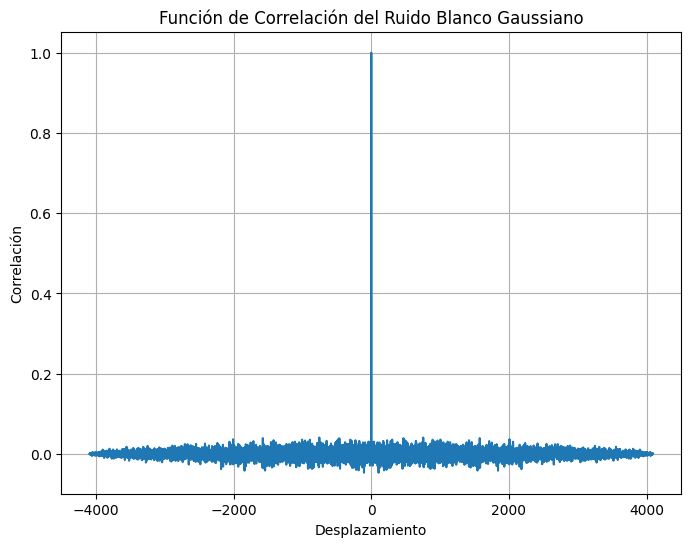

In [52]:
# Calcular la función de correlación
correlacion = np.correlate(RBG, RBG, mode='full')

# Normalizar la función de correlación
correlacion = correlacion / np.max(correlacion)  # Normalización

# Generar el eje temporal
dt = 1.0  # Intervalo de tiempo entre muestras
t = np.arange(-Ndates + 1, Ndates) * dt


# Graficar la función de correlación
plt.figure(figsize=(8, 6))
plt.plot(t, correlacion)
plt.xlabel('Desplazamiento')
plt.ylabel('Correlación')
plt.title('Función de Correlación del Ruido Blanco Gaussiano')
plt.grid(True)
plt.show()

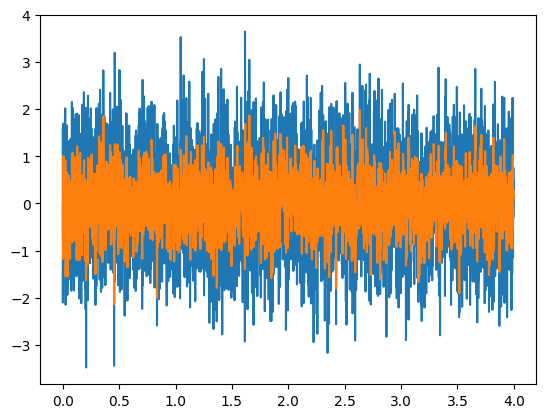

In [53]:


Fdisc=Ndates/4 # FRECUENCIA DE MUESTREO
Tdisc=1/Fdisc
t=np.arange(0,4,Tdisc)
_,Output_Circuit,_=lti_system.output(RBG, t) ##SALIDA DEL CIRCUITO.
plt.plot(t,RBG)
plt.plot(t,Output_Circuit)

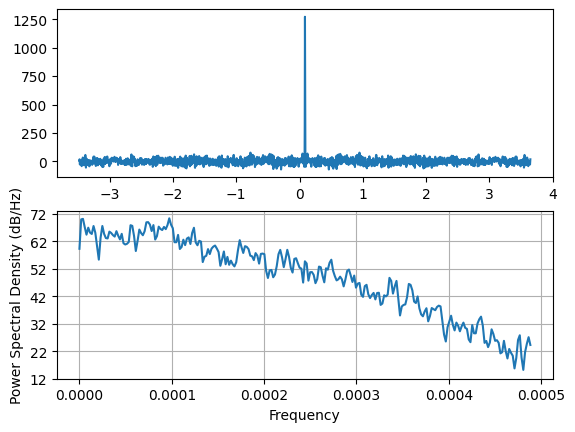

In [54]:
Autocorrelacion_entrada=np.correlate(RBG,RBG,mode="same") ## GENERAMOS LA AUTOCORRELACION
Autocorrelacion_Output2=np.correlate(Output_Circuit,Output_Circuit,mode="same") 
ax = np.linspace(np.min(RBG), np.max(RBG), Ndates)
plt.subplot(211)
plt.plot(ax, Autocorrelacion_Output2) #Graficamos la funcion de autocorrelación
plt.subplot(212)
plt.psd(Autocorrelacion_Output2, 512, Tdisc) #Graficamos la densidad espectral
 
plt.show()

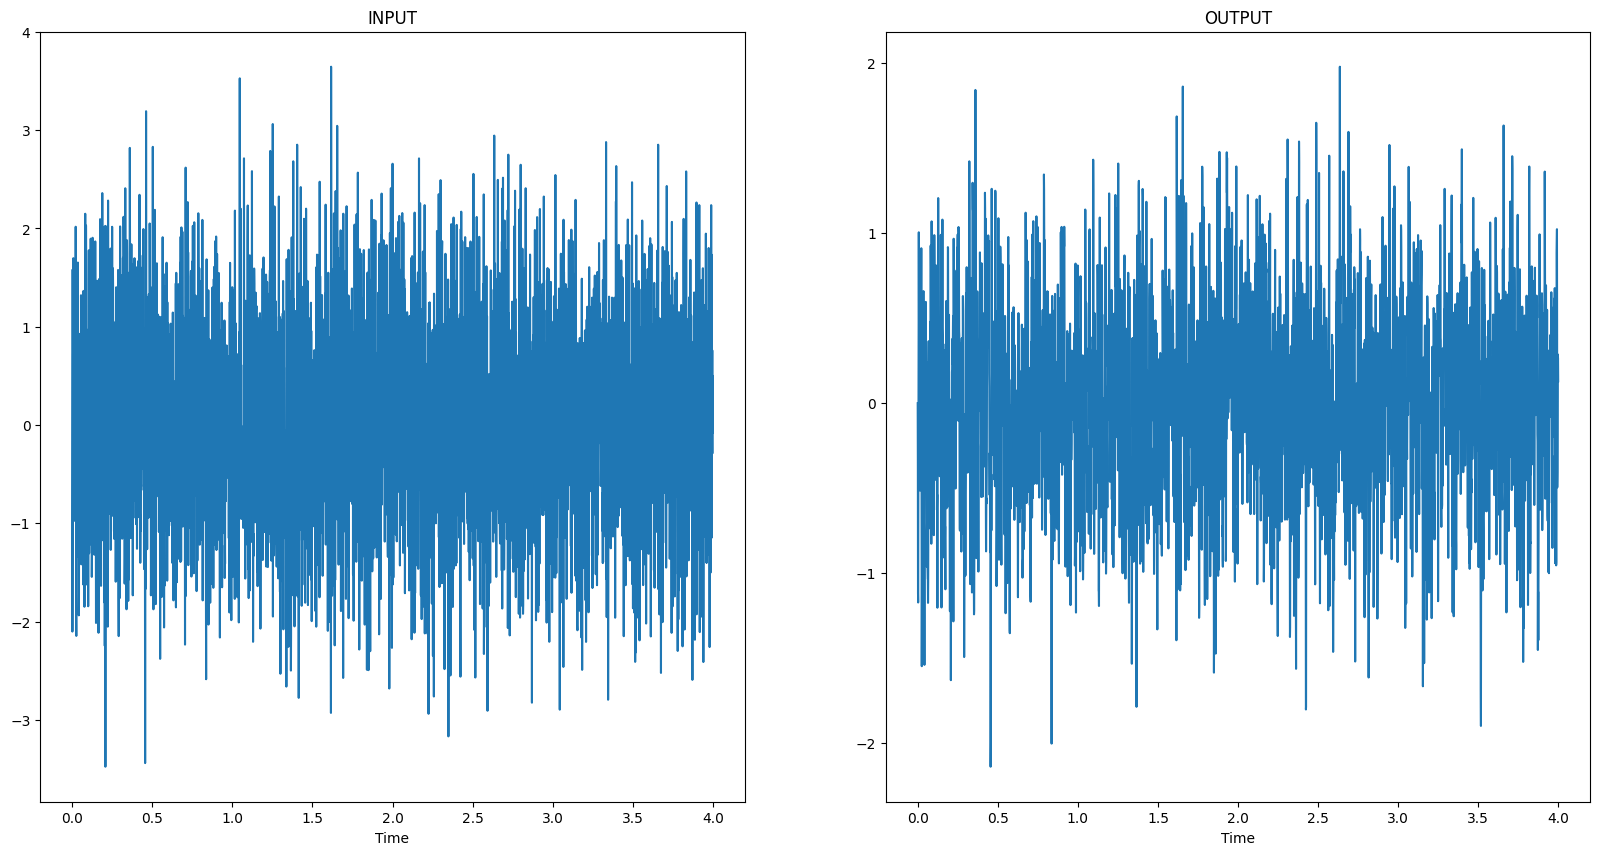

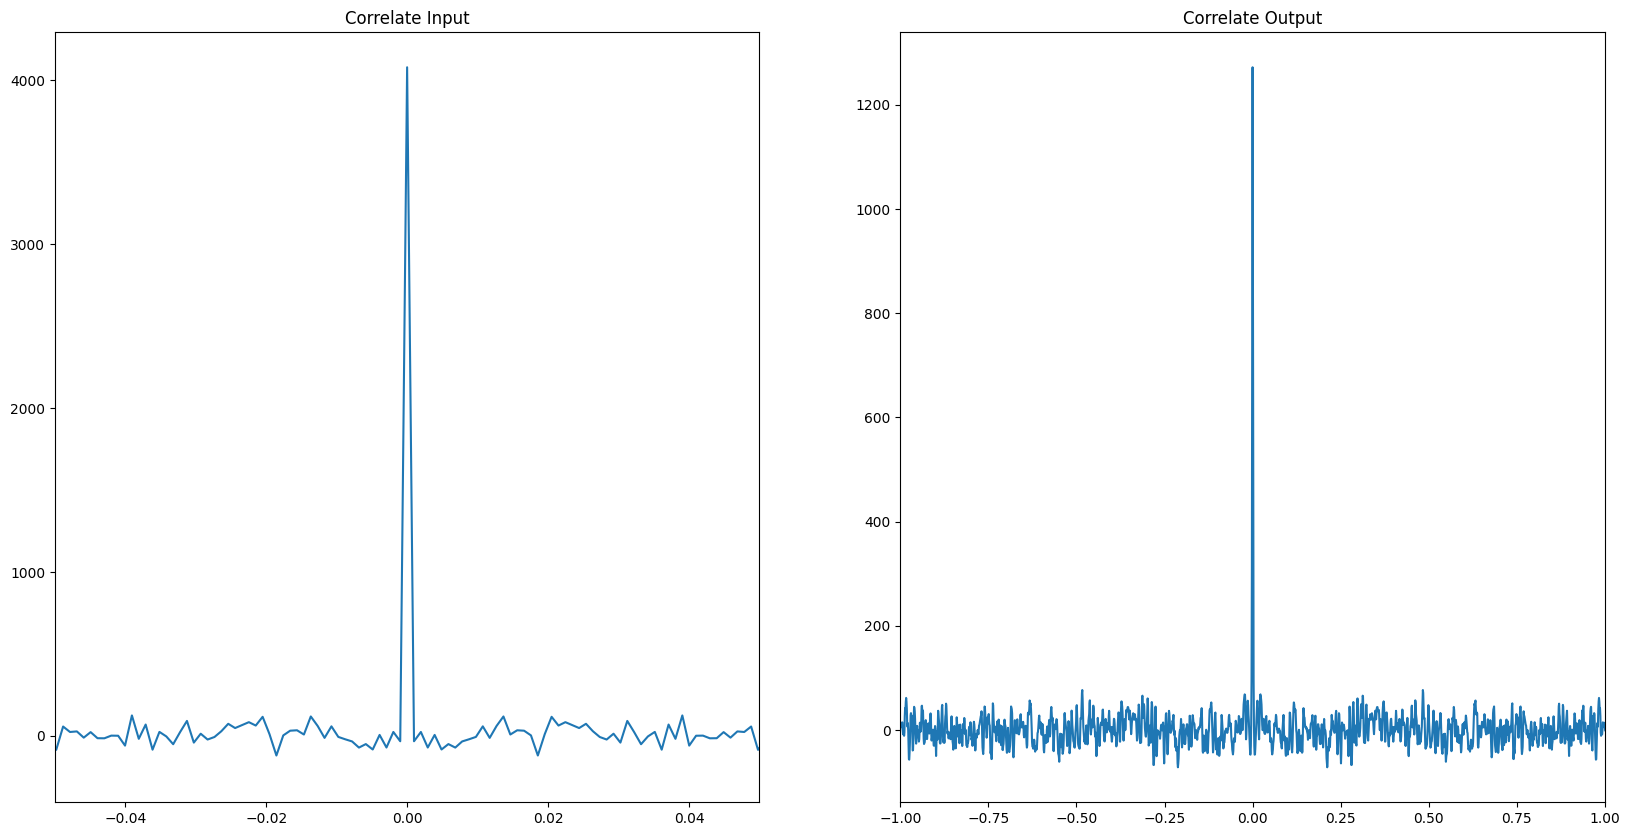

In [55]:
fig, axs = plt.subplots(1, 2,figsize=(20,10))
axs[0].plot(t, RBG)
axs[0].set_title("INPUT")
axs[0].set_xlabel("Time")
axs[1].plot(t, Output_Circuit)
axs[1].set_title("OUTPUT")
axs[1].set_xlabel("Time")




fig, axs = plt.subplots(1, 2,figsize=(20,10))
axs[0].plot(t-2,Autocorrelacion_entrada)
axs[0].set_title("Correlate Input")
axs[0].set_xlim(-0.05,0.05)
axs[1].plot(t-2, Autocorrelacion_Output2)
axs[1].set_title("Correlate Output")
axs[1].set_xlim(-1,1)